(4,9,3), 64.2578125, 67.175, 65.50625
(3,8,3), 70.44212499999999, 72.7875, 70.88749999999999
(2,6,3), 77.59756250000001, 81.70625000000001, 78.60624999999999
(0,3,3), 79.94375, 83.60625, 80.46875
(1,4,3), 84.4361875, 88.625, 86.79375
(0,1,3), 83.12956249999999, 88.56875, 86.2875
(4,9,4), 66.3680625, 69.03125, 71.6375
(3,8,4), 73.73325, 76.70625, 78.125
(2,6,4), 76.4271875, 80.50625, 82.1375
(0,3,4), 77.86462499999999, 81.59375, 83.9375
(1,4,4), 82.77556249999999, 87.59375, 90.0875
(0,1,4), 80.9419375, 85.75, 90.6125
(4,9,5), 65.425625, 68.6875, 70.35
(3,8,5), 69.98975, 73.6, 76.03750000000001
(2,6,5), 73.3175, 76.73125, 79.65
(0,3,5), 73.384875, 78.0875, 81.7375
(1,4,5), 79.3113125, 83.81875, 86.25
(0,1,5), 78.7535, 86.33125, 87.0


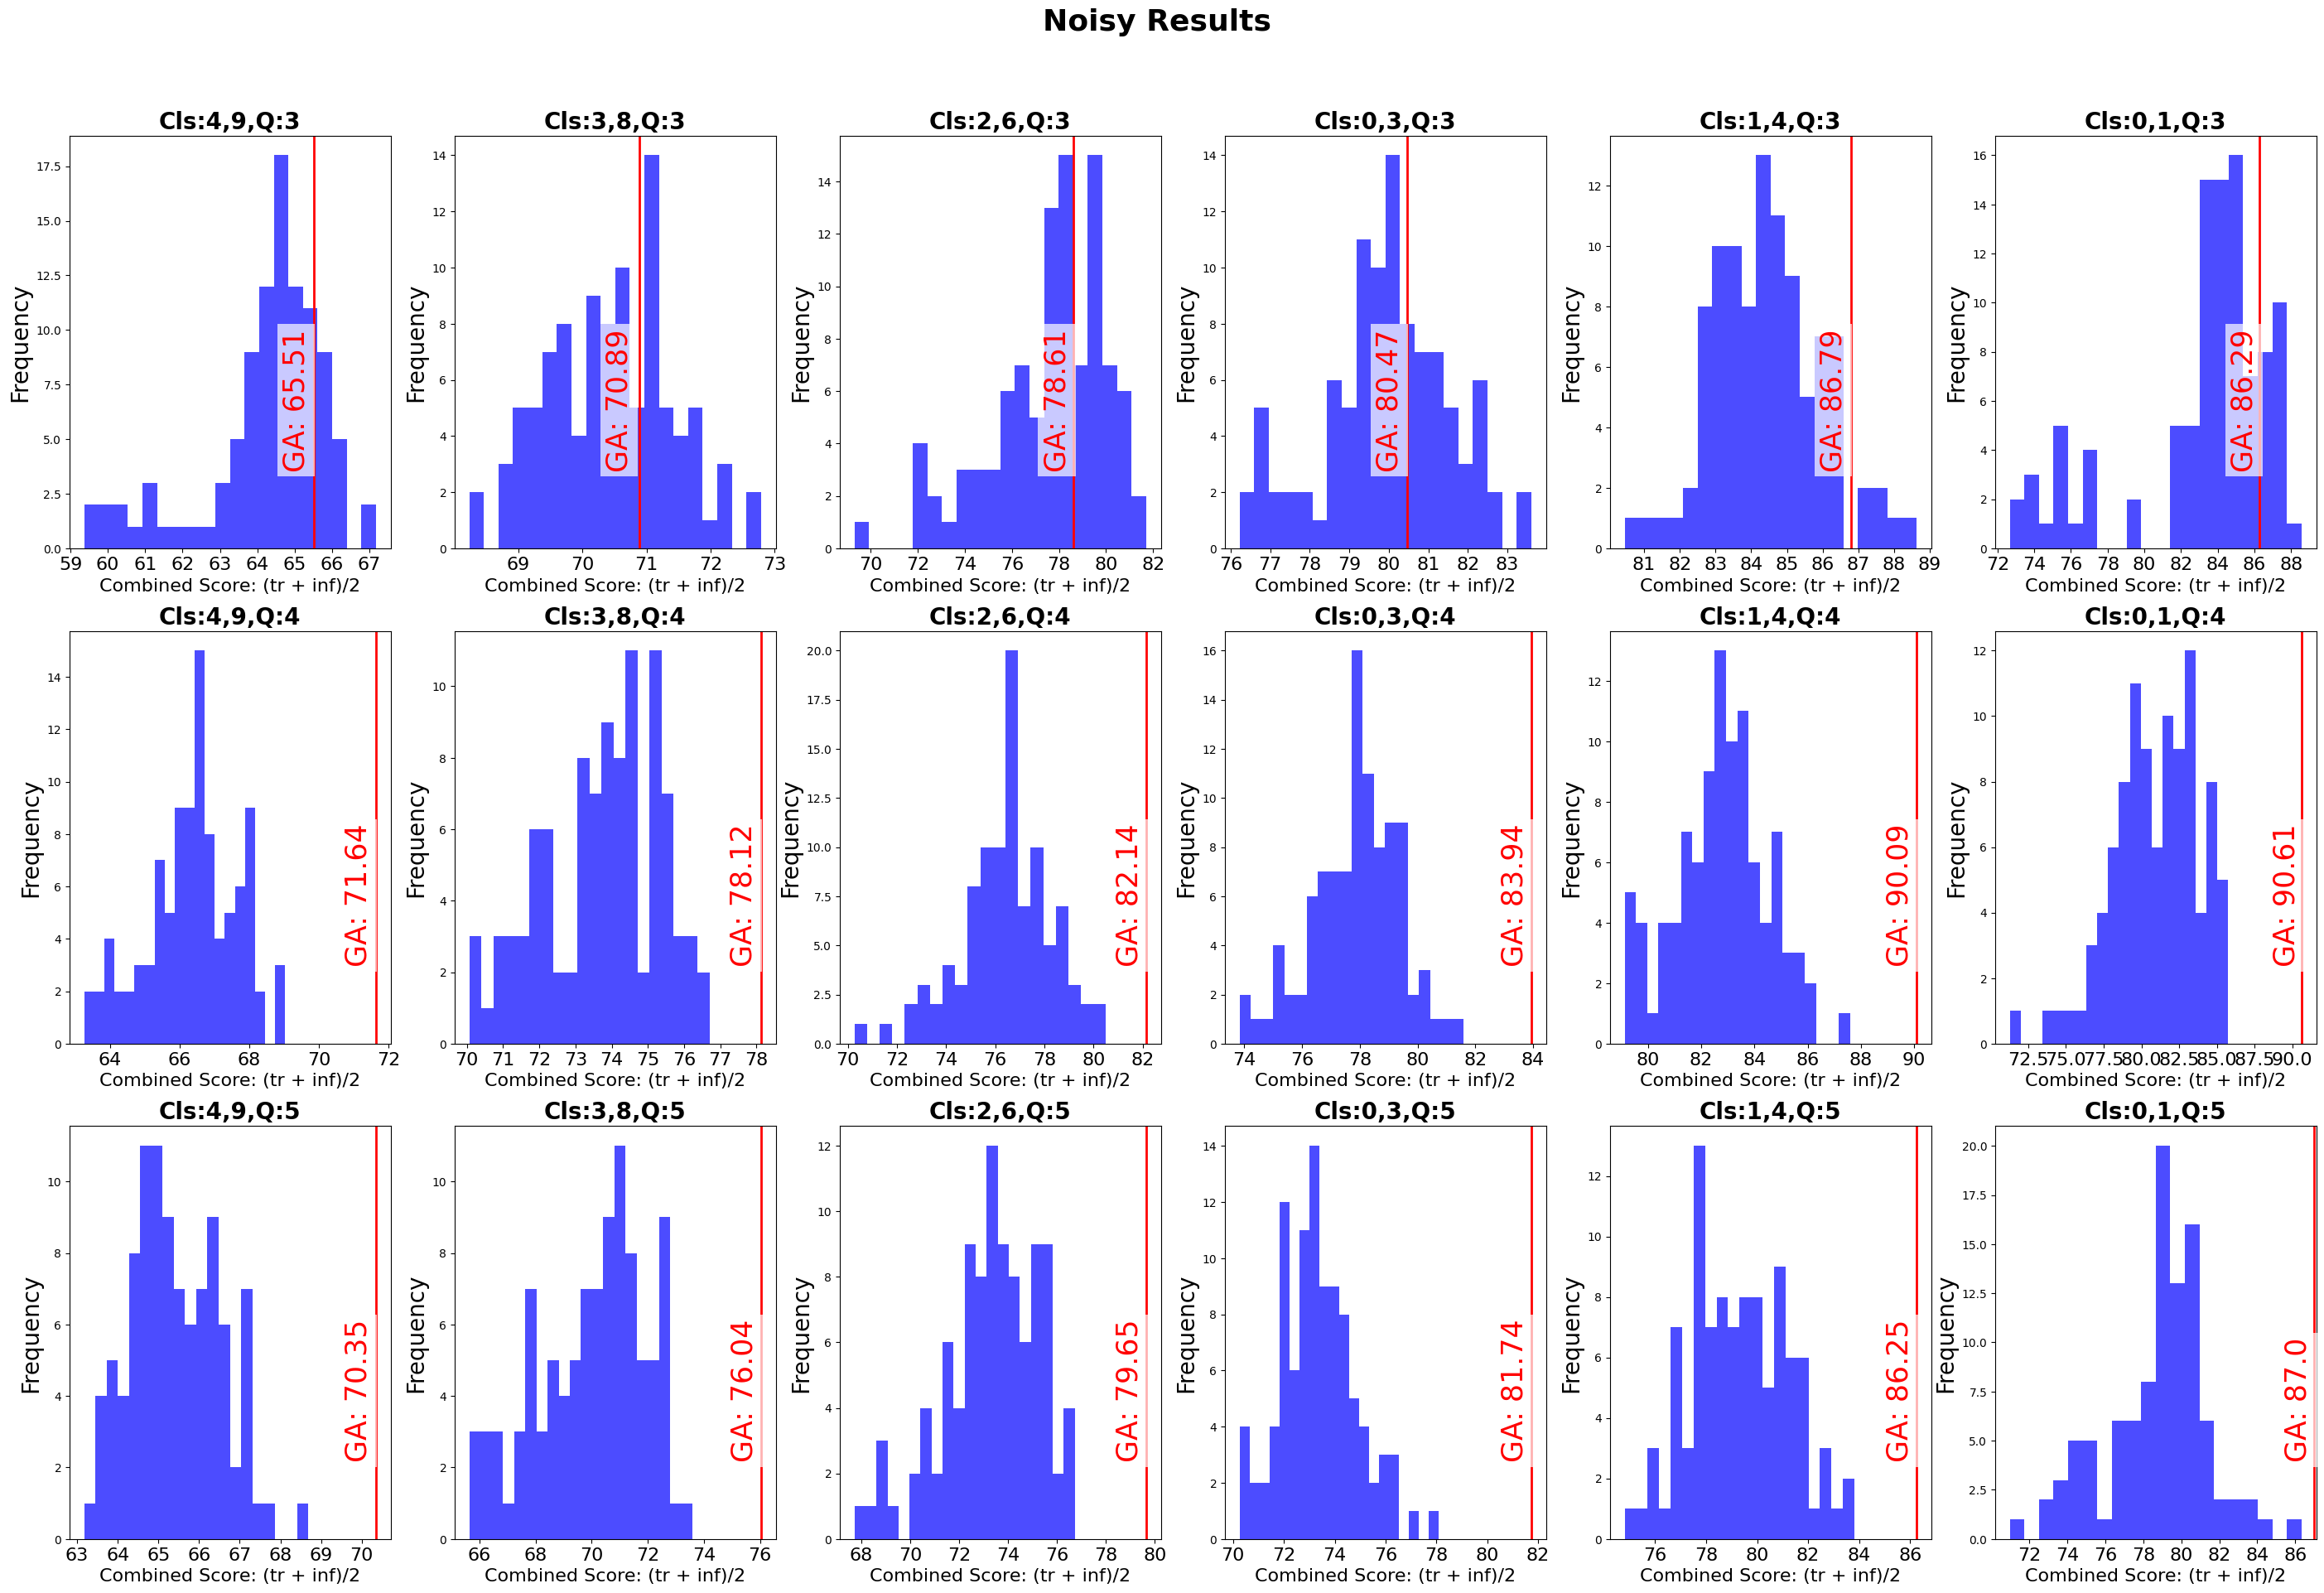

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ga_vals = [65.81, 70.71, 79.24, 82.03, 86.53, 85.57, 65.11, 75.31, 78.27, 76.16, 83.16, 80.97, 65.23, 70.67, 74.75, 76.31, 80.42, 81.11]
ga_dict = {(4,9,3):65.81, (3,8,3):70.71, (2,6,3):79.24, (0,3,3):82.03, (1,4,3):86.53, (0,1,3):85.57, (4,9,4):65.11, (3,8,4):75.31, (2,6,4):78.27, (0,3,4):76.16, (1,4,4):83.16, (0,1,4):80.97, (4,9,5):65.23, (3,8,5):70.67, (2,6,5):74.75, (0,3,5):76.31, (1,4,5):80.42, (0,1,5):81.11}

cls1 = [4, 3, 2, 0, 1, 0, 4, 3, 2, 0, 1, 0, 4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1, 9, 8, 6, 3, 4, 1, 9, 8, 6, 3, 4, 1]
n_qubits = [3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]
ga_dict = {}
for i in range(len(cls1)):
    f = open(f'{n_qubits[i]}q_results/ga_{cls1[i]}_{cls2[i]}.txt', 'r')
    line = f.readline()
    final_score = list(map(float, line.strip().split(", ")))
    if final_score[0] < 1:
        final_score = [x*100 for x in final_score]
    ga_dict[(cls1[i], cls2[i], n_qubits[i])] = max(final_score)

plt.figure(figsize = (35, 22))
plt.suptitle('Noisy Results', fontsize=26, y=0.95, fontweight='bold')

for i in range(len(cls1)):
    with open(f'{n_qubits[i]}q_results/random_perms_{cls1[i]}_{cls2[i]}.txt', 'r') as f:
        lines = f.readlines()

    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]
    print(f'({cls1[i]},{cls2[i]},{n_qubits[i]}), {np.mean(combined_scores)}, {max(combined_scores)}, {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')

    plt.subplot(3, 6, i+1)
    plt.hist(combined_scores, bins=20, color='b', alpha=0.7)
    plt.xlabel('Combined Score: (tr + inf)/2', fontsize=16)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=16)
    plt.title(f'Cls:{cls1[i]},{cls2[i]},Q:{n_qubits[i]}', fontsize=20, fontweight='bold')
    ga_value = ga_dict[(cls1[i], cls2[i], n_qubits[i])]
    plt.axvline(x=ga_dict[(cls1[i], cls2[i], n_qubits[i])], color='r', linewidth=2, label=f'GA: {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')
    plt.text(ga_value - 0.1, plt.ylim()[1] * 0.2, f'GA: {round(ga_value,2)}', color='r', ha='right', rotation=90, fontsize=25, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))






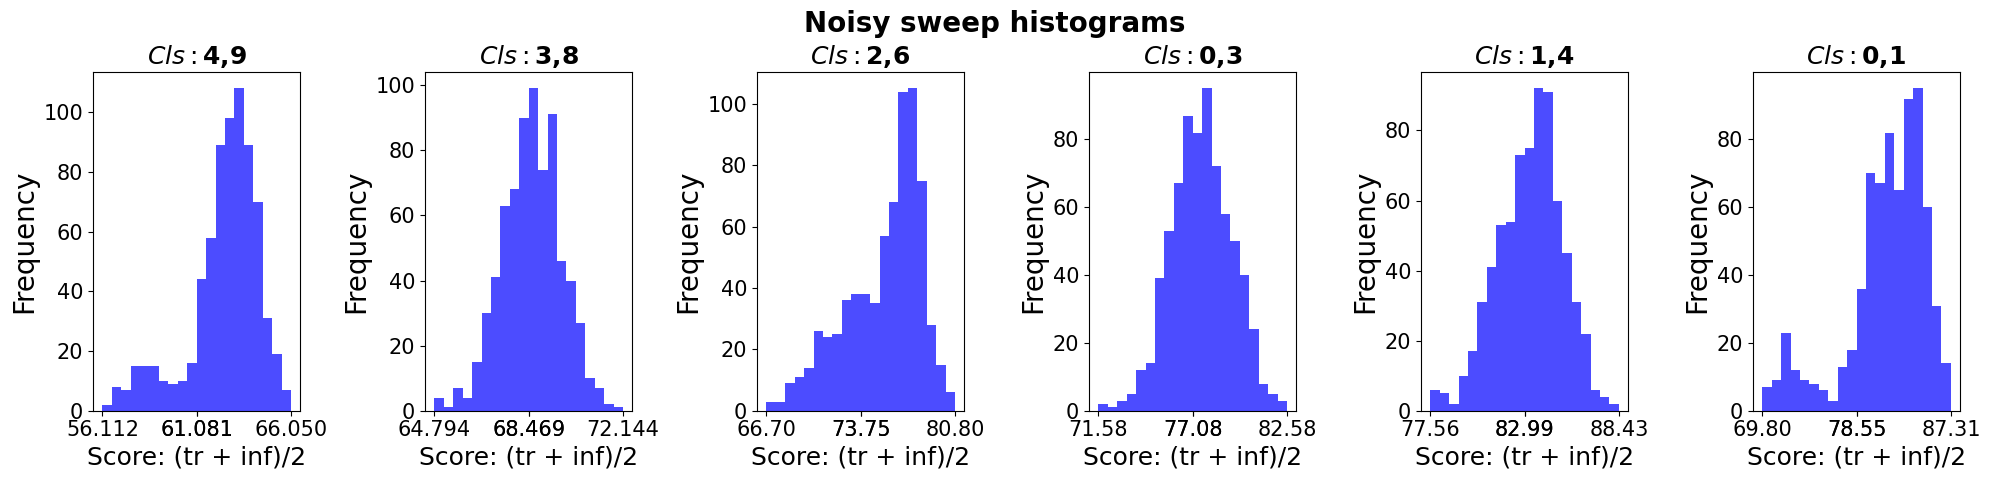

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

cls1 = [4, 3, 2, 0, 1, 0]
cls2 = [9, 8, 6, 3, 4, 1]
features = 6
indices = list(range(features))
all_perms = list(itertools.permutations(indices))

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
plt.suptitle('Noisy sweep histograms', fontsize=20, y=0.95, fontweight='bold') 

for i in range(len(cls1)):
    with open(f'3q_results/brute_force_{cls1[i]}_{cls2[i]}.txt', 'r') as f:
        lines = f.readlines()
    
    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]

    ax = axes[i]
    ax.hist(combined_scores, bins=20, color='b', alpha=0.7)
    ax.set_xlabel('Score: (tr + inf)/2', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=20)
    x_min, x_max = min(combined_scores), max(combined_scores)
    x_ticks = np.linspace(x_min, x_min + (x_max - x_min) * 0.5, 2) 
    end_ticks = np.linspace(x_min + (x_max - x_min) * 0.5, x_max, 2)
    custom_x_ticks = np.concatenate([x_ticks, end_ticks])
    ax.set_xticks(custom_x_ticks)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title(r'$\mathit{Cls:}$'+ r'$\mathbf{' + f'{cls1[i]}' + r'}$' + ',' + r'$\mathbf{' + f'{cls2[i]}' + r'}$', fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0,0,1,1])
plt.savefig('MNIST_brute_force_sweep_noisy.pdf', dpi=600, format='pdf', bbox_inches='tight')
plt.show()

    

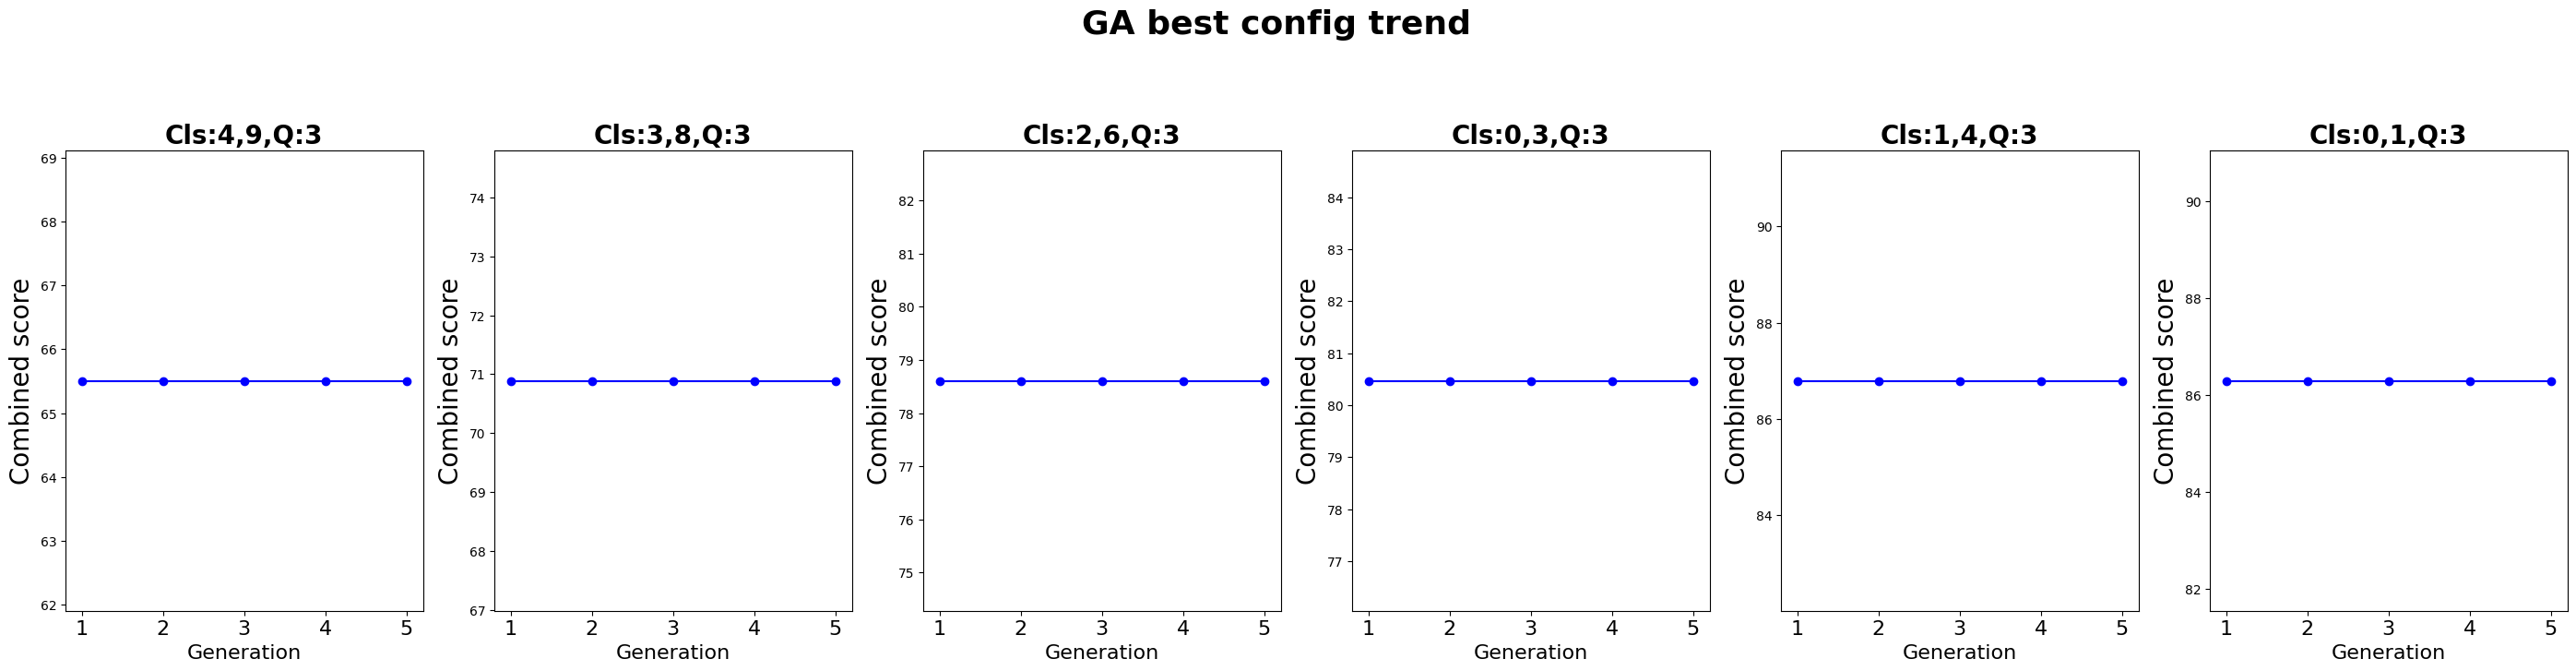

In [4]:
plt.figure(figsize = (35, 22))
plt.suptitle('GA best config trend', fontsize=26, y=0.95, fontweight='bold')

for i in range(len(cls1)):
    f = open(f'{n_qubits[i]}q_results/ga_{cls1[i]}_{cls2[i]}.txt', 'r')
    line = f.readline()
    final_score = list(map(float, line.strip().split(", ")))
    if final_score[0] < 1:
        final_score = [x*100 for x in final_score]
    
    max_vals = []
    for j in range(5):
        max_vals.append(max(final_score[20*j:20*(j+1)]))
    
    plt.subplot(3, 6, i+1)
    generations = [1,2,3,4,5]
    plt.plot(generations, max_vals, color='b', marker='o')
    plt.xlabel('Generation', fontsize=16)
    plt.ylabel('Combined score', fontsize=20)
    plt.xticks(generations, fontsize=16)
    plt.title(f'Cls:{cls1[i]},{cls2[i]},Q:{n_qubits[i]}', fontsize=20, fontweight='bold')

(4,9,6), 64.78437500000001, 67.7125, 68.97500000000001
(0,1,6), 76.668625, 81.89375, 85.475
(4,9,7), 62.78406249999999, 65.84375, 66.68749999999999
(0,1,7), 74.088125, 80.21875, 84.1625
(4,9,8), 62.567875, 69.18125, 68.075
(0,1,8), 73.23862500000001, 80.4625, 82.85


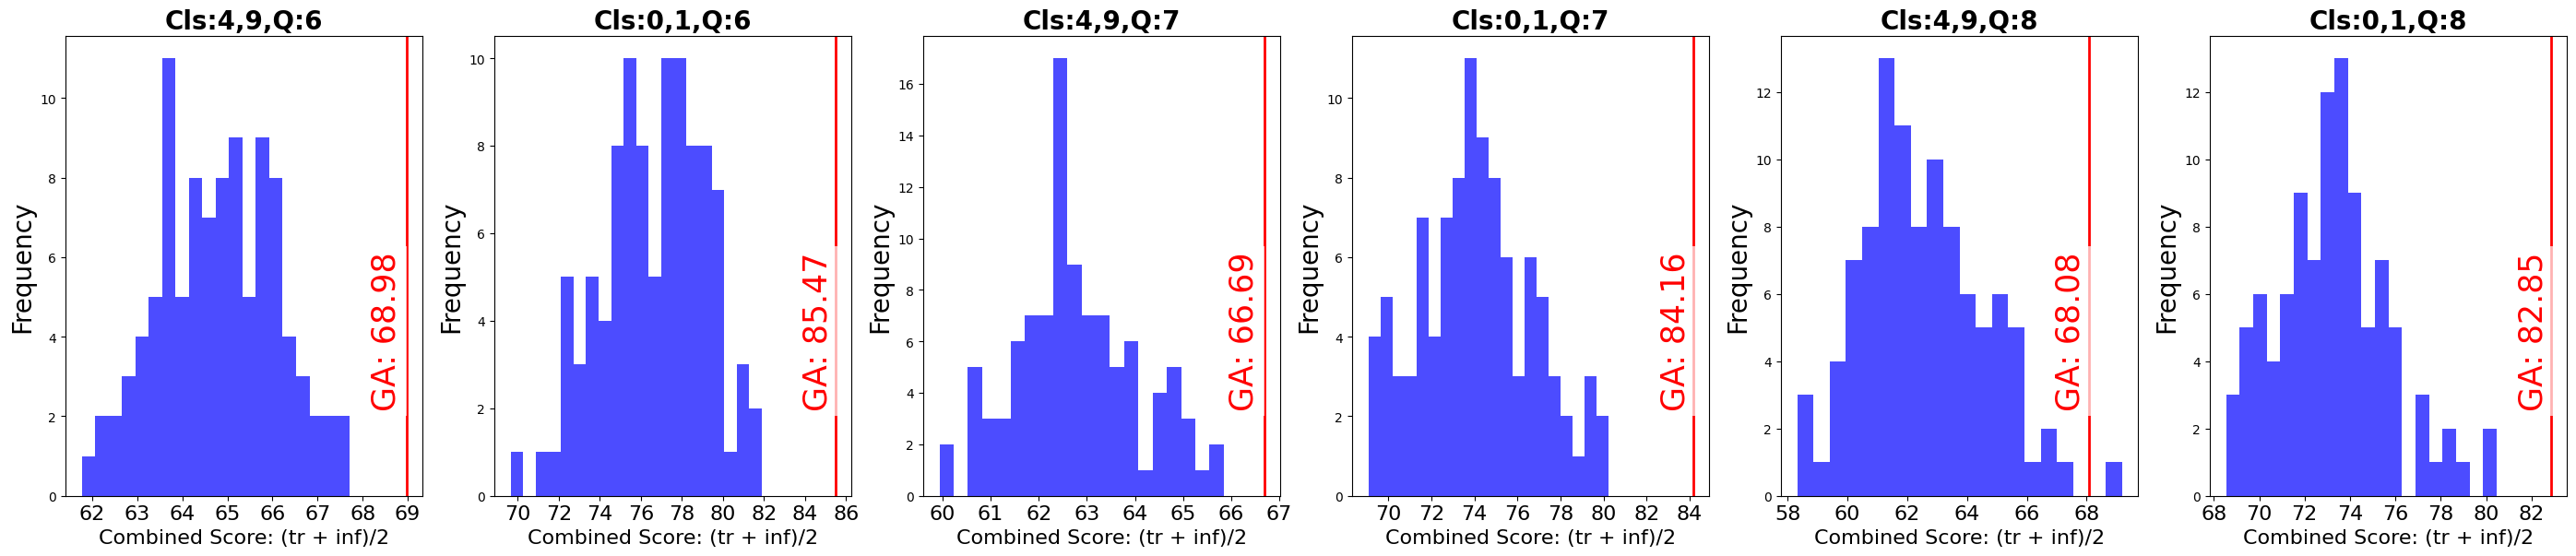

In [6]:
cls1 = [4, 0, 4, 0, 4, 0]
cls2 = [9, 1, 9, 1, 9, 1]
n_qubits = [6, 6, 7, 7, 8, 8]
ga_dict = {}
plt.figure(figsize = (35, 22))
for i in range(len(cls1)):
    f = open(f'{n_qubits[i]}q_results/ga_{cls1[i]}_{cls2[i]}.txt', 'r')
    line = f.readline()
    final_score = list(map(float, line.strip().split(", ")))
    if final_score[0] < 1:
        final_score = [x*100 for x in final_score]
    ga_dict[(cls1[i], cls2[i], n_qubits[i])] = max(final_score)
    f.close()

    with open(f'{n_qubits[i]}q_results/random_perms_{cls1[i]}_{cls2[i]}.txt', 'r') as f:
        lines = f.readlines()

    training_accuracies = list(map(float, lines[0].strip().split(",")))
    inferencing_accuracies = list(map(float, lines[1].strip().split(",")))
    combined_scores = [(t+i)/2 for t,i in zip(training_accuracies, inferencing_accuracies)]
    print(f'({cls1[i]},{cls2[i]},{n_qubits[i]}), {np.mean(combined_scores)}, {max(combined_scores)}, {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')

    plt.subplot(3, 6, i+1)
    plt.hist(combined_scores, bins=20, color='b', alpha=0.7)
    plt.xlabel('Combined Score: (tr + inf)/2', fontsize=16)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=16)
    plt.title(f'Cls:{cls1[i]},{cls2[i]},Q:{n_qubits[i]}', fontsize=20, fontweight='bold')
    ga_value = ga_dict[(cls1[i], cls2[i], n_qubits[i])]
    plt.axvline(x=ga_dict[(cls1[i], cls2[i], n_qubits[i])], color='r', linewidth=2, label=f'GA: {ga_dict[(cls1[i], cls2[i], n_qubits[i])]}')
    plt.text(ga_value - 0.1, plt.ylim()[1] * 0.2, f'GA: {round(ga_value,2)}', color='r', ha='right', rotation=90, fontsize=25, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))